#### Improvement
After features selections, we do pca

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
import sys

In [3]:
os.chdir(r"C:\Users\hanya\Desktop\MSBD5001 Group Project\Individual Project")

In [4]:
training_data = pd.read_csv('./train.csv').drop(['id'], axis=1)
test_data = pd.read_csv('./test.csv').drop(['id'],axis=1)
training_data['n_jobs'].loc[training_data['n_jobs']==-1] = 16
test_data['n_jobs'].loc[test_data['n_jobs']==-1] = 16
training_label = training_data['time']
data_corr = training_data.corr()['time']
data_corr

C:\Users\hanya\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


l1_ratio               -0.005580
alpha                   0.005835
max_iter                0.266155
random_state            0.037263
n_jobs                 -0.252937
n_samples               0.311411
n_features              0.227242
n_classes               0.168375
n_clusters_per_class   -0.066400
n_informative           0.117483
flip_y                  0.118694
scale                   0.002713
time                    1.000000
Name: time, dtype: float64

In [5]:
col_drop = data_corr[abs(data_corr)<0.1]
col_drop.index

Index(['l1_ratio', 'alpha', 'random_state', 'n_clusters_per_class', 'scale'], dtype='object')

In [6]:
training_data.columns

Index(['penalty', 'l1_ratio', 'alpha', 'max_iter', 'random_state', 'n_jobs',
       'n_samples', 'n_features', 'n_classes', 'n_clusters_per_class',
       'n_informative', 'flip_y', 'scale', 'time'],
      dtype='object')

In [7]:
all_data = pd.concat([training_data.drop('time',axis=1), test_data])#.drop('id',axis=1)])
all_data

,penalty,l1_ratio,alpha,max_iter,random_state,n_jobs,n_samples,n_features,n_classes,n_clusters_per_class,n_informative,flip_y,scale
0,none,0.304083,0.0001,417,475,16,1089,327,4,3,7,0.074798,24.242009
1,l1,0.727744,0.0010,578,569,1,790,373,4,5,7,0.077781,54.626302
2,none,0.745885,0.0100,588,529,2,428,1198,2,5,6,0.030196,17.999964
3,none,0.474605,0.0010,829,103,4,877,313,6,5,7,0.057261,82.257222
4,elasticnet,0.395049,0.0010,167,418,2,216,644,8,5,11,0.073728,95.515601
5,l1,0.358837,0.0010,986,94,4,1396,861,4,2,6,0.097483,31.973447
6,none,0.758565,0.0001,929,532,2,908,691,5,2,6,0.095324,98.238367
7,l1,0.282841,0.0001,422,143,8,677,737,9,5,8,0.040463,54.628206
8,l1,0.766176,0.0100,308,85,8,498,1191,2,4,9,0.025639,54.166346
9,l2,0.249018,0.0010,510,574,8,1380,803,9,5,10,0.024620,75.048054


In [8]:
pd.concat([all_data.iloc[:400, :], training_label], axis=1).corr()

,l1_ratio,alpha,max_iter,random_state,n_jobs,n_samples,n_features,n_classes,n_clusters_per_class,n_informative,flip_y,scale,time
l1_ratio,1.000000,0.013393,-0.029675,-0.083398,-0.082302,-0.017739,-0.036154,-0.027836,0.006999,0.029615,0.001380,-0.051272,-0.013337
alpha,0.013393,1.000000,0.054268,-0.050760,-0.110214,0.044290,0.040725,0.008209,-0.010550,0.018743,-0.053854,0.037144,-0.009759
max_iter,-0.029675,0.054268,1.000000,0.077026,-0.068061,-0.028570,-0.037546,-0.025644,-0.089152,-0.017079,0.000659,0.028998,0.264227
random_state,-0.083398,-0.050760,0.077026,1.000000,-0.049259,-0.043883,-0.008492,0.092802,0.029610,0.083650,-0.088009,0.025184,0.043778
n_jobs,-0.082302,-0.110214,-0.068061,-0.049259,1.000000,0.020792,0.010504,0.090677,0.035160,0.000046,-0.050287,-0.007570,-0.256118
n_samples,-0.017739,0.044290,-0.028570,-0.043883,0.020792,1.000000,-0.023044,0.009666,-0.027117,0.038969,0.036897,0.017757,0.296451
n_features,-0.036154,0.040725,-0.037546,-0.008492,0.010504,-0.023044,1.000000,0.004685,0.055585,-0.028838,0.031000,-0.071614,0.220124
n_classes,-0.027836,0.008209,-0.025644,0.092802,0.090677,0.009666,0.004685,1.000000,0.009624,0.407778,0.023026,0.008490,0.166696
n_clusters_per_class,0.006999,-0.010550,-0.089152,0.029610,0.035160,-0.027117,0.055585,0.009624,1.000000,0.241674,-0.010894,0.022547,-0.060997
n_informative,0.029615,0.018743,-0.017079,0.083650,0.000046,0.038969,-0.028838,0.407778,0.241674,1.000000,0.045170,0.016239,0.109154


In [9]:
all_data['n_samples_n_jobs'] = all_data['n_samples']/all_data['n_jobs']
all_data['max_iter_n_jobs'] = all_data['max_iter']/all_data['n_jobs']
all_data['max_iter_n_samples'] = all_data['max_iter']*all_data['n_samples']
all_data['n_samples_n_features'] = all_data['n_samples']*all_data['n_features']
all_data['n_samples_n_features_max_iter'] = all_data['n_samples']*all_data['n_features']*all_data['max_iter']

In [10]:
pd.concat([all_data.iloc[:440, :], training_label], axis=1).corr()

,l1_ratio,alpha,max_iter,random_state,n_jobs,n_samples,n_features,n_classes,n_clusters_per_class,n_informative,flip_y,scale,n_samples_n_jobs,max_iter_n_jobs,max_iter_n_samples,n_samples_n_features,n_samples_n_features_max_iter,time
l1_ratio,1.000000,0.035852,0.001823,-0.076820,-0.065843,-0.002838,-0.012408,-0.042146,0.005067,0.018468,0.012655,-0.062952,0.094838,0.062775,-0.009416,-0.041294,-0.054163,-0.005580
alpha,0.035852,1.000000,0.051756,-0.038741,-0.106539,0.045066,0.032893,-0.007765,-0.012210,0.022716,-0.069142,0.032810,0.121059,0.096167,0.054084,0.031378,0.055295,0.005835
max_iter,0.001823,0.051756,1.000000,0.040533,-0.038563,-0.022548,-0.029092,-0.043984,-0.058226,0.008979,0.005904,0.016948,0.036294,0.478815,0.617951,-0.032570,0.463777,0.266155
random_state,-0.076820,-0.038741,0.040533,1.000000,-0.074142,-0.047291,-0.001048,0.090681,0.013497,0.068591,-0.098552,0.032890,0.046699,0.098968,-0.019125,-0.013934,0.020125,0.037263
n_jobs,-0.065843,-0.106539,-0.038563,-0.074142,1.000000,0.006045,0.003520,0.073822,0.026046,-0.018441,-0.010088,0.008830,-0.580888,-0.599795,-0.036583,0.026098,-0.001744,-0.252937
n_samples,-0.002838,0.045066,-0.022548,-0.047291,0.006045,1.000000,0.016380,0.014555,-0.028680,0.034981,0.042098,0.016398,0.466376,-0.002306,0.693910,0.690267,0.557076,0.311411
n_features,-0.012408,0.032893,-0.029092,-0.001048,0.003520,0.016380,1.000000,0.023771,0.048081,-0.024442,0.024168,-0.076328,0.014974,-0.020309,-0.006074,0.652289,0.499754,0.227242
n_classes,-0.042146,-0.007765,-0.043984,0.090681,0.073822,0.014555,0.023771,1.000000,0.000738,0.392076,0.020233,-0.002255,-0.071526,-0.077851,-0.005387,0.048365,-0.003483,0.168375
n_clusters_per_class,0.005067,-0.012210,-0.058226,0.013497,0.026046,-0.028680,0.048081,0.000738,1.000000,0.242104,-0.028536,0.013880,-0.015739,-0.027858,-0.085562,-0.017102,-0.067812,-0.066400
n_informative,0.018468,0.022716,0.008979,0.068591,-0.018441,0.034981,-0.024442,0.392076,0.242104,1.000000,0.025029,-0.001915,0.014007,-0.009275,0.012699,0.030608,-0.004845,0.117483


In [11]:
# all_data 变成带有time的标准数据
# all_data1 变成进一步处理的数据
all_data1 = all_data.copy()
all_data = pd.concat([all_data1['penalty'],(all_data.iloc[:, 1:] - all_data.iloc[:, 1:].mean())/ all_data.iloc[:, 1:].std()], axis = 1)
all_data1 = all_data.iloc[:,1:]
all_data1

,l1_ratio,alpha,max_iter,random_state,n_jobs,n_samples,n_features,n_classes,n_clusters_per_class,n_informative,flip_y,scale,n_samples_n_jobs,max_iter_n_jobs,max_iter_n_samples,n_samples_n_features,n_samples_n_features_max_iter
0,-0.848814,-0.795198,-0.484663,-0.040021,1.744962,0.679850,-1.127065,-0.760506,-0.387114,-1.061005,0.837412,-0.933788,-0.670257,-0.794420,0.105566,-0.518355,-0.557843
1,0.984458,-0.592743,0.126446,0.287001,-0.963775,-0.007062,-1.018985,-0.760506,1.422771,-1.061005,0.936668,0.141280,1.497199,1.656043,0.113627,-0.625257,-0.496856
2,1.062959,1.431807,0.164403,0.147843,-0.783193,-0.838709,0.919407,-1.556384,1.422771,-1.697608,-0.646688,-1.154646,-0.232112,0.395155,-0.545354,-0.245777,-0.130295
3,-0.110928,-0.592743,1.079170,-1.334194,-0.422028,0.192809,-1.159959,0.035372,1.422771,-1.061005,0.253883,1.118927,-0.216350,0.010007,0.983067,-0.660354,-0.336895
4,-0.455182,-0.592743,-1.433591,-0.238322,-0.783193,-1.325751,-0.382253,0.831251,1.422771,1.485407,0.801800,1.588040,-0.550353,-0.539412,-1.238532,-0.895965,-0.907890
5,-0.611878,-0.592743,1.675096,-1.365505,-0.422028,1.385142,0.127603,-0.760506,-1.292057,-1.697608,1.592259,-0.660231,0.173195,0.184267,3.071112,0.953552,2.338989
6,1.117828,-0.795198,1.458741,0.158280,-0.783193,0.264027,-0.271823,-0.362567,-1.292057,-1.697608,1.520416,1.684378,0.488434,1.152132,1.357638,-0.046210,0.656030
7,-0.940732,-0.795198,-0.465684,-1.195036,0.300302,-0.266665,-0.163743,1.229190,1.422771,-0.424402,-0.305058,0.141348,-0.620532,-0.675934,-0.435940,-0.269782,-0.384415
8,1.150760,1.431807,-0.898395,-1.396816,0.300302,-0.677893,0.902960,-1.556384,0.517828,0.212201,-0.798336,0.125006,-0.687707,-0.739200,-0.861347,-0.105915,-0.462314
9,-1.087088,-0.592743,-0.131662,0.304396,0.300302,1.348384,-0.008672,1.229190,1.422771,0.848804,-0.832220,0.863850,-0.356707,-0.627097,0.908368,0.790298,0.606487


In [12]:
all_data1['n_jobs-1'] = all_data1['n_jobs']**(-1)
all_data1['n_jobs-2'] = all_data1['n_jobs']**(-2)
pd.concat([all_data1.iloc[:440, :], training_label], axis=1).corr()

,l1_ratio,alpha,max_iter,random_state,n_jobs,n_samples,n_features,n_classes,n_clusters_per_class,n_informative,flip_y,scale,n_samples_n_jobs,max_iter_n_jobs,max_iter_n_samples,n_samples_n_features,n_samples_n_features_max_iter,n_jobs-1,n_jobs-2,time
l1_ratio,1.000000,0.035852,0.001823,-0.076820,-0.065843,-0.002838,-0.012408,-0.042146,0.005067,0.018468,0.012655,-0.062952,0.094838,0.062775,-0.009416,-0.041294,-0.054163,-0.014386,-0.016045,-0.005580
alpha,0.035852,1.000000,0.051756,-0.038741,-0.106539,0.045066,0.032893,-0.007765,-0.012210,0.022716,-0.069142,0.032810,0.121059,0.096167,0.054084,0.031378,0.055295,-0.095925,-0.074748,0.005835
max_iter,0.001823,0.051756,1.000000,0.040533,-0.038563,-0.022548,-0.029092,-0.043984,-0.058226,0.008979,0.005904,0.016948,0.036294,0.478815,0.617951,-0.032570,0.463777,-0.041701,-0.031878,0.266155
random_state,-0.076820,-0.038741,0.040533,1.000000,-0.074142,-0.047291,-0.001048,0.090681,0.013497,0.068591,-0.098552,0.032890,0.046699,0.098968,-0.019125,-0.013934,0.020125,-0.053518,-0.056360,0.037263
n_jobs,-0.065843,-0.106539,-0.038563,-0.074142,1.000000,0.006045,0.003520,0.073822,0.026046,-0.018441,-0.010088,0.008830,-0.580888,-0.599795,-0.036583,0.026098,-0.001744,0.518690,-0.021780,-0.252937
n_samples,-0.002838,0.045066,-0.022548,-0.047291,0.006045,1.000000,0.016380,0.014555,-0.028680,0.034981,0.042098,0.016398,0.466376,-0.002306,0.693910,0.690267,0.557076,0.068175,0.035956,0.311411
n_features,-0.012408,0.032893,-0.029092,-0.001048,0.003520,0.016380,1.000000,0.023771,0.048081,-0.024442,0.024168,-0.076328,0.014974,-0.020309,-0.006074,0.652289,0.499754,-0.043587,-0.031340,0.227242
n_classes,-0.042146,-0.007765,-0.043984,0.090681,0.073822,0.014555,0.023771,1.000000,0.000738,0.392076,0.020233,-0.002255,-0.071526,-0.077851,-0.005387,0.048365,-0.003483,0.052225,0.024878,0.168375
n_clusters_per_class,0.005067,-0.012210,-0.058226,0.013497,0.026046,-0.028680,0.048081,0.000738,1.000000,0.242104,-0.028536,0.013880,-0.015739,-0.027858,-0.085562,-0.017102,-0.067812,-0.021115,-0.008222,-0.066400
n_informative,0.018468,0.022716,0.008979,0.068591,-0.018441,0.034981,-0.024442,0.392076,0.242104,1.000000,0.025029,-0.001915,0.014007,-0.009275,0.012699,0.030608,-0.004845,0.021138,0.037522,0.117483


In [13]:
# 添加二次项特征
cols = all_data1.columns
for col1 in range(len(cols)):
    for col2 in range(col1, len(cols)):
        c1 = cols[col1]
        c2 = cols[col2]
        all_data1[str(c1)+'_'+str(c2)] = all_data1[c1] * all_data1[c2]

In [14]:
all_data1 = (all_data1 - all_data1.mean())/all_data1.std()
df_pca = pd.DataFrame(np.mat(all_data1.values).T * np.mat(all_data1.values))
df_pca

,0,1,2,3,4,5,6,7,8,9,...,196,197,198,199,200,201,202,203,204,205
0,539.000000,6.843721,-9.976923,-41.887449,-2.196090e+01,0.562606,3.651047,-26.996533,19.952653,11.011752,...,-8.716448,-18.259291,20.938910,-18.244948,-32.725531,-1.402452e+01,-15.752165,-12.953815,-5.686886,-12.193841
1,6.843721,539.000000,19.929865,-34.187161,-3.739541e+01,8.115712,-0.068527,8.018879,-0.974067,22.296831,...,11.225676,13.268670,4.049904,-10.148175,0.160495,5.069861e+00,8.631887,-29.095332,-30.509670,-34.063485
2,-9.976923,19.929865,539.000000,24.444724,-3.240483e+01,-50.372456,7.540315,-7.809120,0.907825,34.828607,...,-15.738908,8.077246,-19.813721,-8.846467,98.555967,-5.589518e+01,169.379328,6.113505,-10.158977,0.174075
3,-41.887449,-34.187161,24.444724,539.000000,-5.862708e+01,-12.131428,35.305078,34.081761,-4.562947,13.114811,...,25.196826,35.276950,9.437015,69.032309,61.614084,-3.593514e+01,49.143135,-18.177182,-21.419289,-23.181915
4,-21.960896,-37.395415,-32.404829,-58.627083,5.390000e+02,24.902437,18.864918,20.061945,14.240860,-6.476041,...,71.536457,51.430187,20.939251,-8.232847,23.795544,1.776357e-14,-7.337825,-42.318348,125.309212,32.180141
5,0.562606,8.115712,-50.372456,-12.131428,2.490244e+01,539.000000,41.442524,5.461097,-27.386697,-8.158857,...,158.251062,224.171425,-52.311441,56.197020,179.964897,-9.022406e+01,213.756355,-13.885111,6.182727,-7.478345
6,3.651047,-0.068527,7.540315,35.305078,1.886492e+01,41.442524,539.000000,12.508361,26.829596,5.038151,...,140.917074,203.022663,-7.865115,-9.974610,172.474394,-5.866266e+01,208.951216,-9.902266,-35.780508,-16.924081
7,-26.996533,8.018879,-7.809120,34.081761,2.006194e+01,5.461097,12.508361,539.000000,-11.331523,205.703277,...,23.516032,20.630948,-35.853929,-30.518281,27.057739,-5.588589e+00,12.836332,24.977359,23.796269,27.182810
8,19.952653,-0.974067,0.907825,-4.562947,1.424086e+01,-27.386697,26.829596,-11.331523,539.000000,144.022224,...,15.266834,44.925557,3.660177,13.739073,21.699069,2.850823e+01,-11.034921,13.626947,-8.807932,9.819717
9,11.011752,22.296831,34.828607,13.114811,-6.476041e+00,-8.158857,5.038151,205.703277,144.022224,539.000000,...,5.489187,24.434553,-5.298165,-18.499931,29.023256,4.259294e+01,-10.326694,13.825638,19.077702,16.306341


In [15]:
from scipy.linalg import svd
u,w,v = svd(df_pca)

In [16]:
all_data.index = range(len(all_data))
new_data = pd.DataFrame(np.mat(all_data1.values)*np.mat(u[:,:]))
new_data

,0,1,2,3,4,5,6,7,8,9,...,196,197,198,199,200,201,202,203,204,205
0,-0.501101,0.522065,0.760137,0.132021,-2.704433,2.945900,-1.003708,0.299038,-0.398664,-0.085091,...,9.637835e-15,-2.547392e-15,6.556949e-15,1.022560e-14,1.353950e-15,1.083700e-15,4.464852e-15,3.102080e-15,-1.005335e-15,-7.398121e-15
1,-0.121885,0.602913,2.300820,-0.218941,1.482192,-0.004879,0.721342,0.352280,-0.119083,1.206896,...,8.307231e-15,-3.877053e-15,-1.368598e-14,1.148864e-14,5.282288e-15,-1.741903e-15,9.557598e-16,5.341688e-15,-1.609926e-14,-5.269156e-15
2,-1.360342,-0.349504,0.821324,2.211422,1.151846,-0.558867,-0.932985,0.461447,0.122539,-0.355136,...,7.564946e-15,-1.828446e-14,-2.853482e-14,3.133788e-14,2.550936e-14,1.971573e-14,1.496604e-14,3.074385e-14,4.776189e-15,-1.917698e-15
3,-1.072991,-0.090357,-0.066435,1.182190,0.699889,-1.094707,-0.136896,0.256841,0.201094,-0.100581,...,1.381658e-14,2.716339e-15,-1.401227e-14,-1.655986e-14,3.681574e-16,-1.504584e-15,-9.729573e-15,-6.032921e-15,1.899142e-15,-9.457493e-15
4,-1.291821,0.722353,1.045158,1.875572,-1.701684,-0.329822,-1.030773,0.828450,-4.860105,0.160011,...,-6.312841e-15,-1.881181e-14,-4.513266e-14,2.228957e-14,2.580773e-14,-1.171746e-14,2.579072e-14,4.861844e-14,-7.686064e-15,-3.765300e-14
5,3.093435,-6.862566,-1.213357,1.827494,1.672634,1.762780,2.769935,1.337702,-5.097873,-2.284288,...,1.209574e-14,-2.473954e-15,1.515884e-14,1.781542e-14,-6.126647e-15,1.465262e-15,-4.011924e-15,-6.005165e-15,-1.096557e-14,4.045595e-15
6,0.053494,-2.282343,0.958172,1.530572,1.358327,-0.304868,1.386551,1.985516,-1.640435,1.067325,...,-7.506331e-15,-2.685825e-15,3.541402e-14,6.191333e-15,-1.407703e-14,-6.721459e-15,1.146884e-14,-2.562842e-15,1.750831e-15,3.577906e-15
7,-2.324918,0.368469,-4.687187,-2.955451,-0.124179,0.028520,0.594702,-0.295714,-0.939545,0.541717,...,5.545184e-15,2.080957e-15,3.552530e-15,-9.078887e-15,1.817009e-15,-2.236585e-15,-5.486552e-16,-3.037510e-15,5.783204e-15,-9.638466e-15
8,-1.529702,0.314486,-4.078222,-2.937714,-0.298107,0.252572,-2.319030,-1.204962,0.923419,-0.237620,...,-3.558645e-15,4.711339e-16,1.820747e-14,-8.856843e-15,-1.214405e-14,-1.508742e-14,2.559969e-15,-1.047600e-14,1.897424e-15,-6.862909e-15
9,-0.379165,1.924090,-4.620970,-2.161486,1.286255,-1.121228,1.668524,0.051477,-1.198665,-1.272586,...,-5.112957e-15,6.376674e-16,2.442307e-15,-7.607842e-15,-7.675397e-15,-4.956631e-15,-6.266304e-15,-4.839973e-16,1.175779e-15,3.850743e-15


In [17]:
# check the correlation of new features and old features & time
temp = all_data.copy()
temp.index = range(len(temp))
temp = pd.concat([temp.iloc[:440, :], training_label], axis=1)
chk = pd.concat([new_data.iloc[:440, :], temp], axis=1)

In [18]:
chk_corr = chk.corr()

In [19]:
new_data1 = chk.drop(['penalty','time'], axis=1)
new_data1

,0,1,2,3,4,5,6,7,8,9,...,n_classes,n_clusters_per_class,n_informative,flip_y,scale,n_samples_n_jobs,max_iter_n_jobs,max_iter_n_samples,n_samples_n_features,n_samples_n_features_max_iter
0,-0.501101,0.522065,0.760137,0.132021,-2.704433,2.945900,-1.003708,0.299038,-0.398664,-0.085091,...,-0.760506,-0.387114,-1.061005,0.837412,-0.933788,-0.670257,-0.794420,0.105566,-0.518355,-0.557843
1,-0.121885,0.602913,2.300820,-0.218941,1.482192,-0.004879,0.721342,0.352280,-0.119083,1.206896,...,-0.760506,1.422771,-1.061005,0.936668,0.141280,1.497199,1.656043,0.113627,-0.625257,-0.496856
2,-1.360342,-0.349504,0.821324,2.211422,1.151846,-0.558867,-0.932985,0.461447,0.122539,-0.355136,...,-1.556384,1.422771,-1.697608,-0.646688,-1.154646,-0.232112,0.395155,-0.545354,-0.245777,-0.130295
3,-1.072991,-0.090357,-0.066435,1.182190,0.699889,-1.094707,-0.136896,0.256841,0.201094,-0.100581,...,0.035372,1.422771,-1.061005,0.253883,1.118927,-0.216350,0.010007,0.983067,-0.660354,-0.336895
4,-1.291821,0.722353,1.045158,1.875572,-1.701684,-0.329822,-1.030773,0.828450,-4.860105,0.160011,...,0.831251,1.422771,1.485407,0.801800,1.588040,-0.550353,-0.539412,-1.238532,-0.895965,-0.907890
5,3.093435,-6.862566,-1.213357,1.827494,1.672634,1.762780,2.769935,1.337702,-5.097873,-2.284288,...,-0.760506,-1.292057,-1.697608,1.592259,-0.660231,0.173195,0.184267,3.071112,0.953552,2.338989
6,0.053494,-2.282343,0.958172,1.530572,1.358327,-0.304868,1.386551,1.985516,-1.640435,1.067325,...,-0.362567,-1.292057,-1.697608,1.520416,1.684378,0.488434,1.152132,1.357638,-0.046210,0.656030
7,-2.324918,0.368469,-4.687187,-2.955451,-0.124179,0.028520,0.594702,-0.295714,-0.939545,0.541717,...,1.229190,1.422771,-0.424402,-0.305058,0.141348,-0.620532,-0.675934,-0.435940,-0.269782,-0.384415
8,-1.529702,0.314486,-4.078222,-2.937714,-0.298107,0.252572,-2.319030,-1.204962,0.923419,-0.237620,...,-1.556384,0.517828,0.212201,-0.798336,0.125006,-0.687707,-0.739200,-0.861347,-0.105915,-0.462314
9,-0.379165,1.924090,-4.620970,-2.161486,1.286255,-1.121228,1.668524,0.051477,-1.198665,-1.272586,...,1.229190,1.422771,0.848804,-0.832220,0.863850,-0.356707,-0.627097,0.908368,0.790298,0.606487


In [20]:
col_get = ((chk_corr['time'])>0.1).drop('time')
col_get

0                                 True
1                                False
2                                 True
3                                False
4                                 True
5                                 True
6                                 True
7                                False
8                                False
9                                False
10                               False
11                               False
12                               False
13                               False
14                               False
15                               False
16                               False
17                               False
18                                True
19                               False
20                               False
21                                True
22                               False
23                                True
24                                True
25                       

In [21]:
all_data3 = pd.concat([new_data, all_data.drop('penalty', axis=1)], axis=1).loc[:, col_get]
all_data3 = pd.concat([all_data['penalty'], all_data3], axis=1)
all_data3 = pd.get_dummies(all_data3)
all_data3

,0,2,4,5,6,18,21,23,24,63,...,flip_y,n_samples_n_jobs,max_iter_n_jobs,max_iter_n_samples,n_samples_n_features,n_samples_n_features_max_iter,penalty_elasticnet,penalty_l1,penalty_l2,penalty_none
0,-0.501101,0.760137,-2.704433,2.945900,-1.003708,-0.055976,1.191198,-0.240275,-1.071970,-1.340080,...,0.837412,-0.670257,-0.794420,0.105566,-0.518355,-0.557843,0,0,0,1
1,-0.121885,2.300820,1.482192,-0.004879,0.721342,-0.914154,0.824883,0.411948,0.055461,0.619226,...,0.936668,1.497199,1.656043,0.113627,-0.625257,-0.496856,0,1,0,0
2,-1.360342,0.821324,1.151846,-0.558867,-0.932985,1.461185,-2.265128,-0.203571,-0.333404,-1.059277,...,-0.646688,-0.232112,0.395155,-0.545354,-0.245777,-0.130295,0,0,0,1
3,-1.072991,-0.066435,0.699889,-1.094707,-0.136896,-1.421880,0.632086,0.169907,0.433873,-0.638901,...,0.253883,-0.216350,0.010007,0.983067,-0.660354,-0.336895,0,0,0,1
4,-1.291821,1.045158,-1.701684,-0.329822,-1.030773,-2.657311,1.543636,-0.295370,-0.148066,0.721611,...,0.801800,-0.550353,-0.539412,-1.238532,-0.895965,-0.907890,1,0,0,0
5,3.093435,-1.213357,1.672634,1.762780,2.769935,-3.152452,-4.266107,-1.520030,0.284188,-1.434082,...,1.592259,0.173195,0.184267,3.071112,0.953552,2.338989,0,1,0,0
6,0.053494,0.958172,1.358327,-0.304868,1.386551,-2.187577,-0.673831,1.829695,0.056275,1.387217,...,1.520416,0.488434,1.152132,1.357638,-0.046210,0.656030,0,0,0,1
7,-2.324918,-4.687187,-0.124179,0.028520,0.594702,0.717688,0.293709,0.473650,1.310983,0.609506,...,-0.305058,-0.620532,-0.675934,-0.435940,-0.269782,-0.384415,0,1,0,0
8,-1.529702,-4.078222,-0.298107,0.252572,-2.319030,2.284356,0.670932,-2.007575,3.629474,-0.030874,...,-0.798336,-0.687707,-0.739200,-0.861347,-0.105915,-0.462314,0,1,0,0
9,-0.379165,-4.620970,1.286255,-1.121228,1.668524,1.010910,0.996986,2.318634,-0.844111,0.450910,...,-0.832220,-0.356707,-0.627097,0.908368,0.790298,0.606487,0,0,1,0


In [154]:
new_data = all_data3
training_len = 430 #len(training_df_data)-test_training
test_training = len(training_data) - training_len
test_len = len(test_data)

X_train = new_data.iloc[:training_len, :] # training data--cross validation
X_train_test =  new_data.iloc[training_len:training_len+test_training, :] # training data--test
y_train = training_label.iloc[:training_len] # training labels--cross validation
y_train_test = training_label.iloc[-test_training:] # training label--test
x_test = new_data.iloc[-test_len:, :] # test data

In [155]:
pd.concat([new_data.iloc[:440, :], training_label], axis=1).corr()

,0,2,4,5,6,18,21,23,24,63,...,n_samples_n_jobs,max_iter_n_jobs,max_iter_n_samples,n_samples_n_features,n_samples_n_features_max_iter,penalty_elasticnet,penalty_l1,penalty_l2,penalty_none,time
0,1.000000,0.175466,0.109574,0.407909,0.173384,0.103519,0.018209,0.152632,0.039432,0.101208,...,0.411603,0.283387,0.588357,0.623867,0.774103,-0.024840,0.024512,-0.037796,0.037421,0.510318
2,0.175466,1.000000,-0.016320,-0.003600,-0.054837,0.111707,-0.031951,0.013141,-0.065249,-0.003964,...,0.526694,0.315348,-0.079803,0.060433,-0.093439,0.008366,0.057219,-0.113234,0.044071,0.132748
4,0.109574,-0.016320,1.000000,-0.360089,0.019440,-0.027782,-0.015288,0.053639,0.053587,0.011240,...,0.303786,0.330386,0.313126,0.051078,0.268892,0.015312,-0.010596,0.075828,-0.077382,0.151354
5,0.407909,-0.003600,-0.360089,1.000000,0.122367,0.066806,-0.097115,-0.074257,0.008553,-0.016249,...,0.006329,-0.095488,0.202637,0.063245,0.216508,-0.047150,0.030685,-0.015317,0.032640,0.102422
6,0.173384,-0.054837,0.019440,0.122367,1.000000,-0.070713,0.007517,0.022604,-0.014198,-0.019775,...,0.169919,0.145410,0.540640,0.169165,0.365726,0.022692,0.014986,0.002656,-0.039913,0.149549
18,0.103519,0.111707,-0.027782,0.066806,-0.070713,1.000000,0.052280,-0.005144,0.085307,-0.018969,...,0.132838,-0.044731,0.013004,0.306181,0.187632,-0.022556,0.036267,-0.028827,0.015248,0.181479
21,0.018209,-0.031951,-0.015288,-0.097115,0.007517,0.052280,1.000000,-0.012449,-0.020897,0.054712,...,0.106451,0.091626,0.060166,0.040453,0.011450,0.068162,-0.100687,0.012161,0.016623,0.117090
23,0.152632,0.013141,0.053639,-0.074257,0.022604,-0.005144,-0.012449,1.000000,0.023793,0.005482,...,0.129311,0.112784,0.144287,0.240808,0.163855,0.025404,0.006480,-0.016990,-0.015766,0.270156
24,0.039432,-0.065249,0.053587,0.008553,-0.014198,0.085307,-0.020897,0.023793,1.000000,0.031753,...,0.088756,0.231755,0.189685,-0.028112,0.087417,-0.016352,0.122351,-0.096049,-0.010093,0.187722
63,0.101208,-0.003964,0.011240,-0.016249,-0.019775,-0.018969,0.054712,0.005482,0.031753,1.000000,...,0.113968,0.121746,0.005511,0.077308,0.056484,0.115674,-0.078621,-0.061216,0.017111,0.166577


#### Ridge

In [24]:
from sklearn.metrics import mean_squared_error, roc_auc_score, log_loss
import lightgbm as lgb
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score
from tqdm import tqdm

In [25]:
from sklearn.linear_model import Ridge

In [30]:
params = np.linspace(1,10,num=100)
test_scores = []
for param in tqdm(params):
    clf1 = Ridge(alpha=param)
    test_score = cross_val_score(clf1, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
    test_scores.append(np.mean(-test_score))

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 30.27it/s]


Text(0.5, 1.0, 'max_depth vs CV Error')

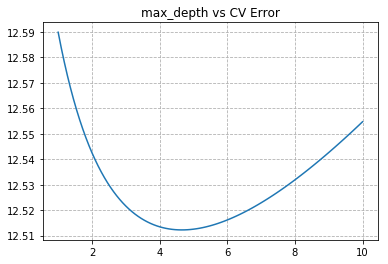

In [31]:
plt.plot(params, test_scores)
plt.grid(True, linestyle='--')
plt.title("max_depth vs CV Error")

In [156]:
clf1_test = Ridge(alpha=4.5)
clf1_test.fit(X_train, y_train) 

Ridge(alpha=4.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [157]:
y_train_test_pre = clf1_test.predict(X_train)
y_train_test_pre[y_train_test_pre<0]=0.45
print("Mean squared test error: %.2f" % mean_squared_error(y_train, y_train_test_pre))

Mean squared test error: 7.51


In [158]:
y_train_test_pre = clf1_test.predict(X_train_test)
y_train_test_pre[y_train_test_pre<0]=0.45
print("Mean squared test error: %.2f" % mean_squared_error(y_train_test, y_train_test_pre))

Mean squared test error: 14.14


In [159]:
clf1_test.coef_

array([ 0.40834743, -0.21645937, -0.50868405, -0.05119746, -0.43592813,
        0.12629032, -0.02599863,  0.46982405,  0.10735168,  0.24210494,
        0.0729212 ,  0.14544392,  1.70918335,  0.83885925, -0.41012078,
        0.0151128 ,  0.95054162,  0.24304373,  0.26686069,  2.58310461,
        0.2741924 , -0.23658391, -0.60883081,  2.5730021 ,  1.98854406,
        1.53603523, -1.62152327, -1.90305602])

#### Lasso

In [39]:
from sklearn.linear_model import Lasso

In [44]:
params = np.linspace(0.01,0.1,num=100)
test_scores = []
for param in tqdm(params):
    clf2 = Lasso(alpha=param)
    test_score = cross_val_score(clf2, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
    test_scores.append(np.mean(-test_score))

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 26.13it/s]


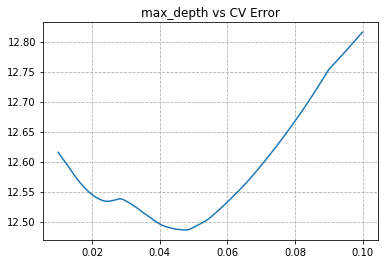

In [45]:
plt.plot(params, test_scores)
plt.grid(True, linestyle='--')
plt.title("max_depth vs CV Error");

In [160]:
clf2_test = Lasso(alpha=0.05)
clf2_test.fit(X_train, y_train)

Lasso(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [47]:
y_train_test_pre = clf2_test.predict(X_train)
y_train_test_pre[y_train_test_pre<0]=0.45
print("Mean squared test error: %.2f" % mean_squared_error(y_train, y_train_test_pre))

Mean squared test error: 8.68


In [48]:
y_train_test_pre = clf2_test.predict(X_train_test)
y_train_test_pre[y_train_test_pre<0]=0.45
print("Mean squared test error: %.2f" % mean_squared_error(y_train_test, y_train_test_pre))

Mean squared test error: 4.65


### LightGBM

In [49]:
from sklearn.metrics import mean_squared_error, roc_auc_score, log_loss
import lightgbm as lgb

In [54]:
#params = range(10,1000,100)
params = range(1,10)

test_scores = []
for param in tqdm(params):
    #clf = XGBClassifier(max_depth=param)
    clf = lgb.LGBMRegressor(
        max_depth=param,
        num_leaves=31,
        learning_rate=0.03,
        n_estimators=200,
        subsample=.9,
        colsample_bytree=.9,
        random_state=1,
        reg_lambda=1,
        min_data=1
    )
    test_score = cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
    test_scores.append(np.mean(-test_score))

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:23<00:00,  3.78s/it]


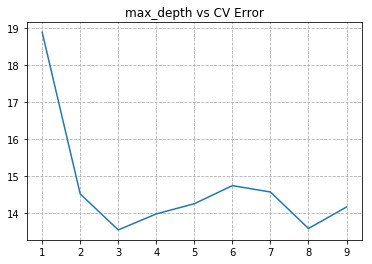

In [55]:
plt.plot(params, test_scores)
plt.grid(True, linestyle='--')
plt.title("max_depth vs CV Error");

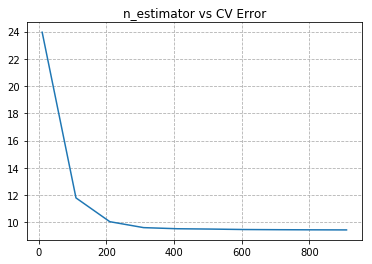

In [60]:
plt.plot(params, test_scores)
plt.grid(True, linestyle='--')
plt.title("n_estimator vs CV Error");

In [161]:
reg_lgb = lgb.LGBMRegressor(
        max_depth=3,
        num_leaves=31,
        learning_rate=0.05,
        n_estimators=200,
        subsample=.9,
        colsample_bytree=.9,
        random_state=1,
        reg_lambda=1,
        min_data=1
    )

reg_lgb.fit(X_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=0.9,
       importance_type='split', learning_rate=0.05, max_depth=3,
       min_child_samples=20, min_child_weight=0.001, min_data=1,
       min_split_gain=0.0, n_estimators=200, n_jobs=-1, num_leaves=31,
       objective=None, random_state=1, reg_alpha=0.0, reg_lambda=1,
       silent=True, subsample=0.9, subsample_for_bin=200000,
       subsample_freq=0)

In [57]:
y_train_test_pre = reg_lgb.predict(X_train_test)
y_train_test_pre[y_train_test_pre<0]=0.45
print("Mean squared test error: %.2f" % mean_squared_error(y_train_test, y_train_test_pre))

Mean squared test error: 5.21


In [58]:
y_train_test_pre = reg_lgb.predict(X_train)
y_train_test_pre[y_train_test_pre<0]=0.45
print("Mean squared test error: %.2f" % mean_squared_error(y_train, y_train_test_pre))

Mean squared test error: 0.32


#### Random Forest

In [59]:
from sklearn.ensemble import RandomForestRegressor

In [69]:
#params = range(1,20)
params = range(10,1000,100)
test_scores = []
for param in tqdm(params):
    reg_rf = RandomForestRegressor(n_estimators=param, max_depth=6)
    test_score = cross_val_score(reg_rf, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
    test_scores.append(-np.mean(test_score))

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [01:43<00:00, 15.45s/it]


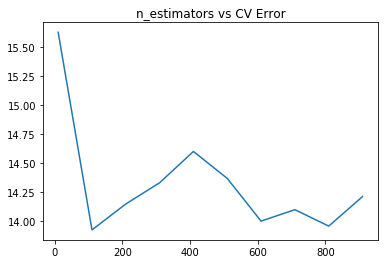

In [70]:
plt.plot(params, test_scores)
plt.title("n_estimators vs CV Error");

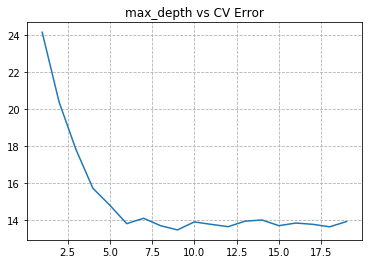

In [68]:
plt.plot(params, test_scores)
plt.grid(True, linestyle='--')
plt.title("max_depth vs CV Error");

In [162]:
reg_rf = RandomForestRegressor(n_estimators=200, max_depth=6)
reg_rf.fit(X_train, y_train) 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [72]:
y_train_test_pre = reg_rf.predict(X_train_test)
y_train_test_pre[y_train_test_pre<0]=0.45
print("Mean squared test error: %.2f" % mean_squared_error(y_train_test, y_train_test_pre))

Mean squared test error: 7.02


In [73]:
y_train_test_pre = reg_rf.predict(X_train)
y_train_test_pre[y_train_test_pre<0]=0.45
print("Mean squared test error: %.2f" % mean_squared_error(y_train, y_train_test_pre))

Mean squared test error: 2.08


#### SVM

In [74]:
from sklearn.svm import SVR

In [77]:
params = range(20,100)
test_scores = []
for param in tqdm(params):
    reg_svm = SVR(gamma='scale', C=param, epsilon=0.2)
    test_score = cross_val_score(reg_svm, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
    test_scores.append(-np.mean(test_score))

100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [00:12<00:00,  6.37it/s]


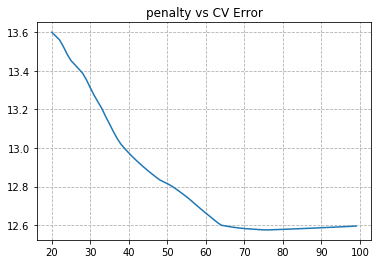

In [78]:
plt.plot(params, test_scores)
plt.grid(True, linestyle='--')
plt.title("penalty vs CV Error");

In [163]:
reg_svr = SVR(gamma='scale', C=65, epsilon=0.2)
reg_svr.fit(X_train, y_train) 

SVR(C=65, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [84]:
y_train_test_pre = reg_svr.predict(X_train_test)
y_train_test_pre[y_train_test_pre<0]=0.45
print("Mean squared test error: %.2f" % mean_squared_error(y_train_test, y_train_test_pre))

Mean squared test error: 4.18


In [85]:
y_train_test_pre = reg_svr.predict(X_train)
y_train_test_pre[y_train_test_pre<0]=0.45
print("Mean squared test error: %.2f" % mean_squared_error(y_train, y_train_test_pre))

Mean squared test error: 0.05


### GradientBoosting

In [93]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics

In [117]:
#params = range(10,1000,100)
params = np.linspace(0.1,0.8,100)
#params = range(1,20)
test_scores = []
for param in tqdm(params):
    gbs = GradientBoostingRegressor(
            max_depth=4,
            learning_rate=param,
            n_estimators=100,
            random_state=1)
    test_score = cross_val_score(gbs, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
    test_scores.append(-np.mean(test_score))

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:47<00:00,  1.03it/s]


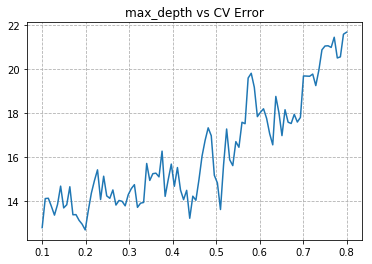

In [118]:
plt.plot(params, test_scores)
plt.grid(True, linestyle='--')
plt.title("max_depth vs CV Error");

In [164]:
gbs = GradientBoostingRegressor(
            max_depth=2,
            learning_rate=0.2,
            n_estimators=20,
            random_state=1)
gbs.fit(X_train, y_train) 

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.2, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=20, n_iter_no_change=None, presort='auto',
             random_state=1, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [144]:
y_train_test_pre = gbs.predict(X_train_test)
y_train_test_pre[y_train_test_pre<0]=0.45
print("Mean squared test error: %.2f" % mean_squared_error(y_train_test, y_train_test_pre))

Mean squared test error: 7.46


In [145]:
y_train_test_pre = gbs.predict(X_train)
y_train_test_pre[y_train_test_pre<0]=0.45
print("Mean squared test error: %.2f" % mean_squared_error(y_train, y_train_test_pre))

Mean squared test error: 3.61


In [165]:
y_train_test_pre1 = reg_svr.predict(X_train_test) 
y_train_test_pre2 = clf1_test.predict(X_train_test)
y_train_test_pre3 = gbs.predict(X_train_test)
y_train_test_pre4 = clf2_test.predict(X_train_test)
y_train_test_pre5 = reg_lgb.predict(X_train_test)
y_train_test_pre6 = reg_rf.predict(X_train_test)

y_train_test_pre1[y_train_test_pre1<0]=0.45
y_train_test_pre2[y_train_test_pre2<0]=0.45
y_train_test_pre3[y_train_test_pre3<0]=0.45
y_train_test_pre4[y_train_test_pre3<0]=0.45
y_train_test_pre5[y_train_test_pre3<0]=0.45
y_train_test_pre6[y_train_test_pre3<0]=0.45

y_train_test_pre = (y_train_test_pre1 + y_train_test_pre2+y_train_test_pre3+y_train_test_pre4+y_train_test_pre5+y_train_test_pre6)/6
print("Mean squared test error: %.2f" % mean_squared_error(y_train_test, y_train_test_pre))

Mean squared test error: 15.11


In [169]:
y_train_test_pre1 = reg_svr.predict(x_test) 
y_train_test_pre2 = clf1_test.predict(x_test)
y_train_test_pre3 = gbs.predict(x_test)
y_train_test_pre4 = clf2_test.predict(x_test)
y_train_test_pre5 = reg_lgb.predict(x_test)
y_train_test_pre6 = reg_rf.predict(x_test)

y_train_test_pre1[y_train_test_pre1<0]=0.45
y_train_test_pre2[y_train_test_pre2<0]=0.45
y_train_test_pre3[y_train_test_pre3<0]=0.45
y_train_test_pre4[y_train_test_pre4<0]=0.45
y_train_test_pre5[y_train_test_pre5<0]=0.45
y_train_test_pre6[y_train_test_pre6<0]=0.45

rst = (y_train_test_pre1 + y_train_test_pre2+y_train_test_pre3+y_train_test_pre4+y_train_test_pre5+y_train_test_pre6)/6

In [170]:
rt = pd.concat([pd.Series(range(len(rst))), pd.Series(rst)], axis=1)

In [172]:
rt.to_csv('./submission_t3_6ensembling.csv')